In [64]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from kjetilplot import savePlot
plt.style.use('ggplot')

# Linear transport

## Characteristics

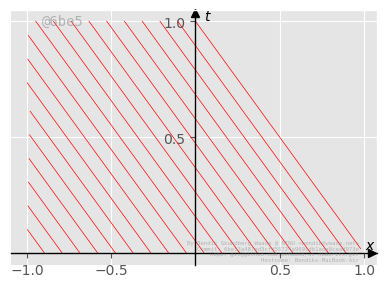

In [40]:
a = 1
M = 50
x0 = np.linspace(-1,1, 20)
#chars = np.zeros((M,len(x0)))
t = np.linspace(0,1,M)
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.spines['left'].set_position(('data',0.0))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['bottom'].set_color('black')
ax.set_xticks([-1,-.5,.5,1])
ax.set_yticks([.5,1])
ax.plot(0.986, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, .986, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.annotate('$t$', (.05,1.005))
ax.annotate('$x$', (1.005,.02))
# ax.set_xlabel('$x$')
# ax.set_ylabel('$t$')
# ax.set_ylim(-.1,1.1)

for i, x in enumerate(x0):
    l = x-a*t
    idx = np.where(abs(x-a*t)<1)
    ax.plot(l[idx], t[idx], color='red', linewidth=.5)
# ax.set_xlim(-1.5,1.5)
# ax.set_ylim(-.3,1.3)
# plt.savefig('characteristics/lin_a{a}.pdf')
plt.tight_layout()
savePlot(f'characteristics/lin_a{a}.pdf')
plt.show()

# Burger's equation

## Characteristics

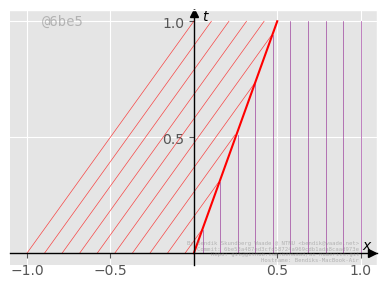

In [110]:
a = lambda x: 1 if x <= 0 else 0
# a = lambda x: -np.sin(np.pi*x)
M = 50
x0 = np.linspace(-1,1, 20)
cmap = mpl.colormaps['brg']
normalizer = mpl.colors.Normalize(vmin=-1,vmax=3)
col = lambda x: cmap(normalizer(x))
#chars = np.zeros((M,len(x0)))
t = np.linspace(0,1,M)
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.spines['left'].set_position(('data',0.0))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['bottom'].set_color('black')
ax.set_xticks([-1,-.5,.5,1])
ax.set_yticks([.5,1])
ax.plot(0.986, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, .986, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.annotate('$t$', (.05,1.005))
ax.annotate('$x$', (1.005,.02))
# ax.set_xlabel('$x$')
# ax.set_ylabel('$t$')
# ax.set_ylim(-.1,1.1)

for i, x in enumerate(x0):
    l = x+a(x)*t
    # idx = np.where(abs(x-a(x)*t)<1)
    idx = np.where(l<t/2) if x<=0 else np.where(l>t/2)
    ax.plot(l[idx], t[idx], color=col(a(x)), linewidth=.5, alpha=.7)
ax.plot(t/2, t, color='red')
# ax.set_xlim(-1.5,1.5)
# ax.set_ylim(-.3,1.3)
# plt.savefig('characteristics/lin_a{a}.pdf')
plt.tight_layout()
savePlot(f'characteristics/burgers_RH_shock.pdf')
plt.show()

## Solution

INFO: CFL number is 0.75


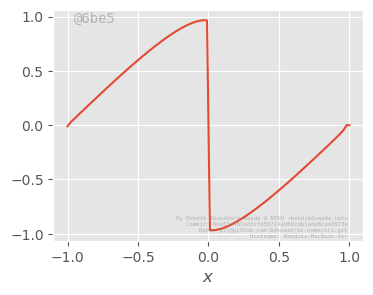

In [45]:
F = lambda u: u**2/2
init = lambda x: -np.sin(np.pi*x)
q = lambda p: 0.
def LW_step(u_w, u_p, u_e, q_p, dt, dx):
    r = dt/dx
    F_w, F_p, F_e = F(u_w), F(u_p), F(u_e)
    u_iph = (u_p+u_e)/2
    u_imh = (u_p+u_w)/2
    tmp = u_p - r/2*(F_e-F_w)
    nosource = tmp + r/2*(u_iph*(F_e-F_p) - u_imh*(F_p-F_w))
    return nosource + dt*q_p
def get_sol(tgrid, xgrid):
    cfl_max_speed = 3
    dt = tgrid[1]-tgrid[0]
    dx = xgrid[1]-xgrid[0]
    print(f'INFO: CFL number is {(cfl:=cfl_max_speed*dt/dx):.2f}')
    if cfl > 1.:
        print('Returning empty')
        return np.array([])
    V = np.zeros((len(xgrid), len(tgrid)))
    V[:,0] = init(xgrid)
    for n,t in enumerate(tgrid[:-1]):
        for i,x in enumerate(xgrid[1:-1]):
            q_p = q((t, x))
            V[i,n+1] = LW_step(V[i-1,n], V[i,n], V[i+1,n], q_p, dt, dx)
        
        V[0,n+1] = LW_step(V[-1,n], V[0,n], V[1,n], q((t,-1)), dt, dx)
        V[-1,n+1] = LW_step(V[-2,n], V[-1,n], V[0,n], q((t,1-dx)), dt, dx)
    return V

tgrid = np.linspace(0,1,200)
xgrid = np.linspace(-1,1,100)
V = get_sol(tgrid, xgrid)
# plot_idx = [0,50,100]
# fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,3))
# ax1.plot(xgrid, V[:,plot_idx[0]])
# ax2.plot(xgrid, V[:,plot_idx[1]])
# ax3.plot(xgrid, V[:,plot_idx[2]])
# for ax in (ax1,ax2,ax3):
#     ax.set_xlabel('$x$')
# print(f'Times: {tgrid[0]:.2f}, {tgrid[plot_idx[1]]:.2f}, {tgrid[plot_idx[2]]:.2f}')
# plt.tight_layout()
# savePlot(f'characteristics/burgers_shock_sol.pdf')
idx = 100
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(xgrid, V[:,idx])
ax.set_xlabel('$x$')
# plt.tight_layout()
savePlot(f'solutions/burgers_shock_t-{tgrid[idx]:.2f}.pdf')
plt.show()

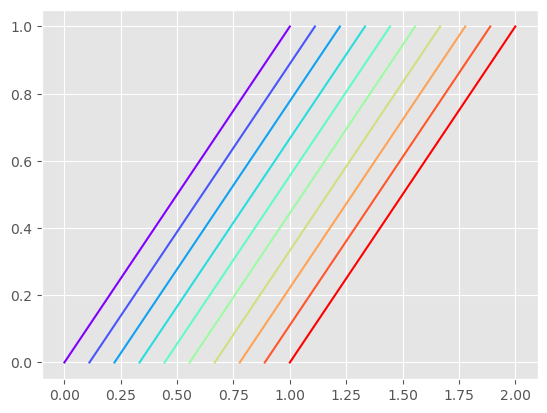

In [63]:
def test():
    import matplotlib as mpl
    x = np.linspace(0,1,10)
    x0 = np.linspace(0,1,10)
    t = np.linspace(0,1,10)
    cmap = mpl.colormaps['rainbow']
    print(cmap)
    fig, ax = plt.subplots(1,1)
    for x in x0:
        ax.plot(x+t,t,color=cmap(x))
    # print(mpl.colormaps['viridis'](x))
test()
